# 12-7 决策树的局限性

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(
    max_depth=2, criterion='entropy', random_state=666)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best')

In [4]:
def plot_decision_boundary(model, axis):

    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 200)).reshape(
            -1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 200)).reshape(
            -1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)

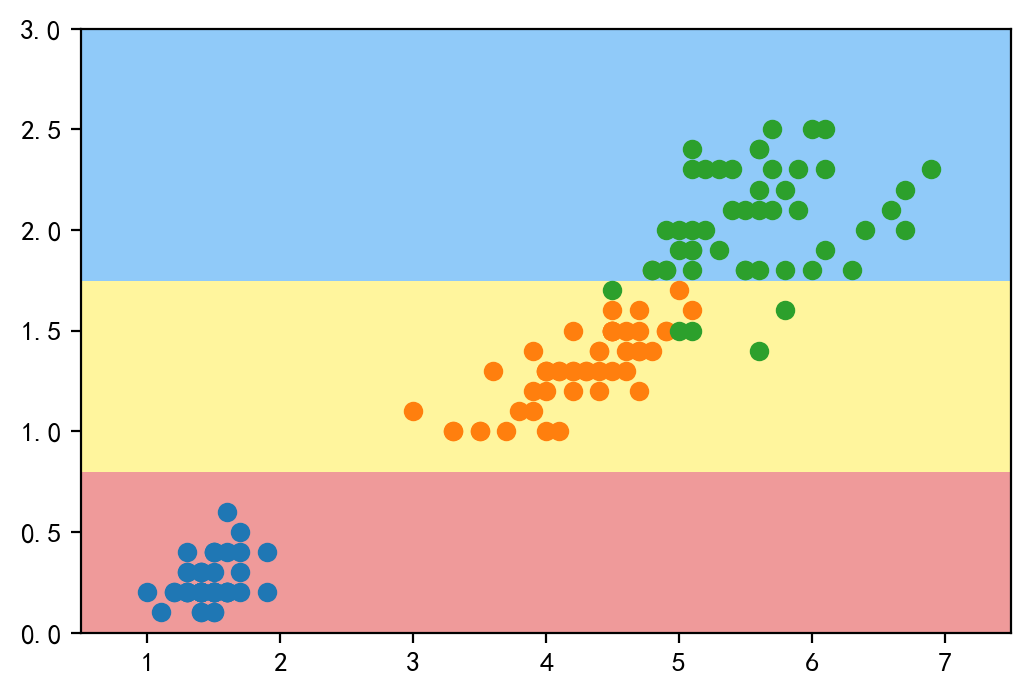

In [5]:
plt.figure(dpi=100)
plot_decision_boundary(tree_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

删除一个点。

In [6]:
len(X)

150

In [7]:
X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y, 138)

In [8]:
X_new.shape

(149, 2)

In [9]:
tree_clf2 = DecisionTreeClassifier(
    max_depth=2, criterion='entropy', random_state=666)
tree_clf2.fit(X_new, y_new)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best')

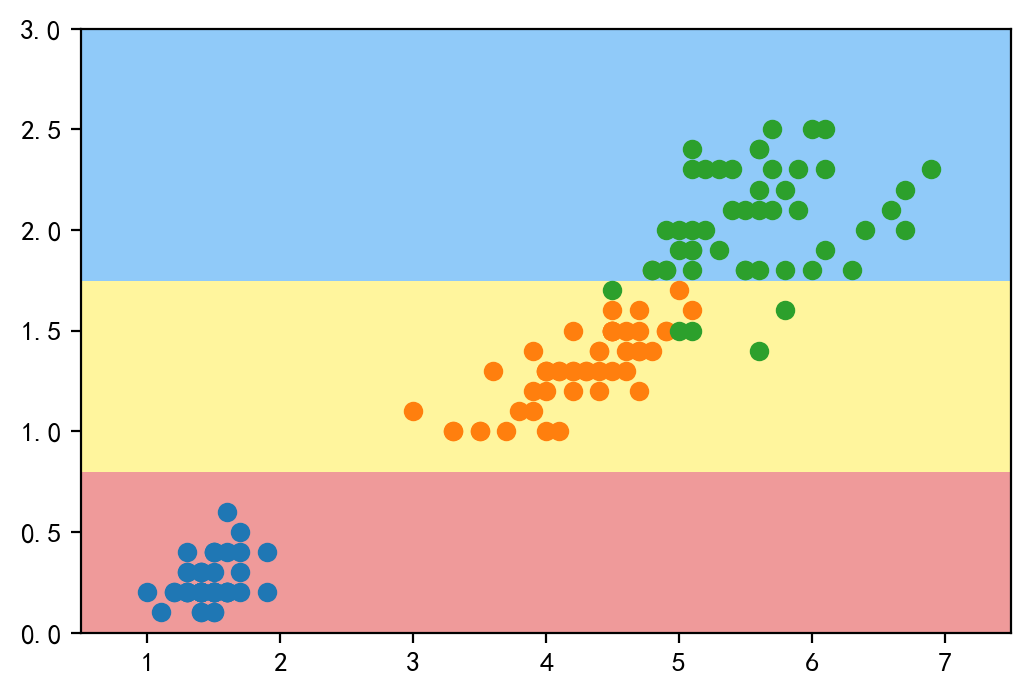

In [10]:
plt.figure(dpi=100)
plot_decision_boundary(tree_clf2, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

---

In [11]:
a = np.arange(0, 32).reshape(4, 8)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])

In [12]:
# 删了第 0 行
b = np.delete(a, 0, axis=0)
b

array([[ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31]])

In [13]:
# 删了第 0 列
c = np.delete(a, 0, axis=1)
c

array([[ 1,  2,  3,  4,  5,  6,  7],
       [ 9, 10, 11, 12, 13, 14, 15],
       [17, 18, 19, 20, 21, 22, 23],
       [25, 26, 27, 28, 29, 30, 31]])